In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import glob, os
from IPython.display import Image
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVR
from sklearn import metrics
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
import pydotplus
from sklearn.externals.six import StringIO
#path = "C:\\Users\\Mohamed\\MS BGD\\fil_rouge_lepoint\\Predictions éléctions\\PRESIDENTIELLES_1965-2012-csv\\" 
#path_to_csv = "C:\\Users\\Mohamed\\git\\Elections\\Analyses\\Jointure des tables\\"
import matplotlib.pyplot as plt
%matplotlib inline
from collections import Counter

In [2]:
ls

Analyse corrélation et decision tree sur La Base.ipynb  Jointure des tables/
Chomage/                                                la_base.csv
decision_tree_print_2.pdf                               la_base_notebook.ipynb
decision_tree_print.pdf                                 prediction.ipynb
decision_tree_split5.pdf                                test_donnee_panel.R
ETL.ipynb


In [3]:
dft11 = pd.read_csv("la_base.csv", encoding="latin1")

In [4]:
dft11.columns

Index(['Unnamed: 0', 'département', 'code', 'Année', 'taux_Blancs et nuls',
       'taux_xdroite', 'taux_gauche', 'taux_Abstention', 'taux_xgauche',
       'taux_centre', 'taux_vert', 'taux_droite', 'depart_frontalier',
       'depart_OM', 'depart_CORSE', '0-19ans', '20-39ans', '40-59ans',
       '60-74ans', '75+ans', 'Total', 'Naissances domiciliées par département',
       'Nombre total de mariages domiciliés',
       'Décès domiciliés par département', 'Q1_rate', 'Q2_rate', 'Q3_rate',
       'Q4_rate', 'var_chomage_annee', 'taux_chomage',
       'taux_centre_sup_moyenne', 'taux_droite_sup_moyenne',
       'taux_gauche_sup_moyenne', 'taux_vert_sup_moyenne',
       'taux_xdroite_sup_moyenne', 'taux_xgauche_sup_moyenne',
       'taux_Abstention_sup_moyenne', 'taux_Blancs et nuls_sup_moyenne',
       'Date', 'pop_verts', 'pop_centre', 'pop_droite', 'pop_gauche',
       'pop_xdroite', 'pop_xgauche', 'pop_premier_ministre', 'cohabitation',
       'pop_president', 'droite_au_pouvoir', 'Dis

In [5]:
dft11.drop('Unnamed: 0', axis=1, inplace=True)

In [6]:
dft11.columns

Index(['département', 'code', 'Année', 'taux_Blancs et nuls', 'taux_xdroite',
       'taux_gauche', 'taux_Abstention', 'taux_xgauche', 'taux_centre',
       'taux_vert', 'taux_droite', 'depart_frontalier', 'depart_OM',
       'depart_CORSE', '0-19ans', '20-39ans', '40-59ans', '60-74ans', '75+ans',
       'Total', 'Naissances domiciliées par département',
       'Nombre total de mariages domiciliés',
       'Décès domiciliés par département', 'Q1_rate', 'Q2_rate', 'Q3_rate',
       'Q4_rate', 'var_chomage_annee', 'taux_chomage',
       'taux_centre_sup_moyenne', 'taux_droite_sup_moyenne',
       'taux_gauche_sup_moyenne', 'taux_vert_sup_moyenne',
       'taux_xdroite_sup_moyenne', 'taux_xgauche_sup_moyenne',
       'taux_Abstention_sup_moyenne', 'taux_Blancs et nuls_sup_moyenne',
       'Date', 'pop_verts', 'pop_centre', 'pop_droite', 'pop_gauche',
       'pop_xdroite', 'pop_xgauche', 'pop_premier_ministre', 'cohabitation',
       'pop_president', 'droite_au_pouvoir', 'Dissident', 'Supe

# Taux de gauche : 

In [7]:
dft12 = dft11.drop(["code", "département", 'taux_Abstention', 'taux_Blancs et nuls', 'taux_droite', 'taux_xgauche',\
                    'taux_vert', 'taux_xdroite','taux_centre', 'Q1_rate', 'Q2_rate', 'Q3_rate', 'Q4_rate', "Total", \
                   'depart_OM', "Date"], axis=1)

dft12 = dft12[dft12["Année"]!=1981]

dft12["Date"] = dft12["Année"] - 1987

dft12.dropna(axis=1, inplace=True)

df_train = dft12[dft12["Année"]!=2012]
df_train.drop("Année", axis=1, inplace=True)
df_test = dft12[dft12["Année"]==2012]
df_test.drop("Année", axis=1, inplace=True)
df_train_x = df_train.drop("taux_gauche", axis=1)
df_train_y = df_train["taux_gauche"]
df_test_x = df_train.drop("taux_gauche", axis=1)
df_test_y = df_train["taux_gauche"]



/home/brehelin/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/brehelin/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [8]:
df_train.columns

Index(['taux_gauche', 'depart_frontalier', 'depart_CORSE', '0-19ans',
       '20-39ans', '40-59ans', '60-74ans', '75+ans',
       'Naissances domiciliées par département',
       'Nombre total de mariages domiciliés',
       'Décès domiciliés par département', 'var_chomage_annee', 'taux_chomage',
       'taux_centre_sup_moyenne', 'taux_droite_sup_moyenne',
       'taux_gauche_sup_moyenne', 'taux_vert_sup_moyenne',
       'taux_xdroite_sup_moyenne', 'taux_xgauche_sup_moyenne',
       'taux_Abstention_sup_moyenne', 'taux_Blancs et nuls_sup_moyenne',
       'pop_centre', 'pop_droite', 'pop_gauche', 'pop_xdroite', 'pop_xgauche',
       'pop_premier_ministre', 'cohabitation', 'pop_president',
       'droite_au_pouvoir', 'Dissident', 'Superficie ', 'Densité',
       'persistance_gauche', 'persistance_droite', 'persistance centre',
       'persistance_centre_droite', 'pres_centre', 'pres_droite',
       'pres_gauche', 'pres_xgauche', 'importations', 'subventions',
       'conjoncture travaux 

In [18]:
# Export de la table de train pour un prune d'arbre sur R
df_export = pd.concat([df_train_x, df_train_y], axis=1)
df_export.to_csv("base_train_gauche.csv",index=False)

In [9]:
name_columns = df_train_x.columns

In [10]:
#ss = StandardScaler()
#df_train_x = ss.fit_transform(df_train_x)
#df_test_x = ss.transform(df_test_x)

In [11]:
svr = LinearSVR()
svr.fit(df_train_x, df_train_y)
print(metrics.mean_squared_error(df_test_y, svr.predict(df_test_x)))
print(metrics.mean_absolute_error(df_test_y, svr.predict(df_test_x)))

svr.score(df_test_x, df_test_y)

3.95304008746
1.41192195687


0.88042516497972223

In [12]:
svr = LinearRegression()
svr.fit(df_train_x, df_train_y)
print(metrics.mean_squared_error(df_test_y, svr.predict(df_test_x)))
print(metrics.mean_absolute_error(df_test_y, svr.predict(df_test_x)))

for i in range(len(svr.coef_)):
    print(svr.coef_[i], df_train.drop("taux_gauche", axis=1).columns[i])

svr.score(df_test_x, df_test_y)


3.50872183106
1.4694038405
0.0469814137331 depart_frontalier
0.146822191185 depart_CORSE
0.155799221366 0-19ans
-0.00610623569421 20-39ans
-1.97796037995 40-59ans
-0.999583015436 60-74ans
1.70084758139 75+ans
0.0165243824501 Naissances domiciliées par département
-0.493072462614 Nombre total de mariages domiciliés
-0.555192731157 Décès domiciliés par département
0.124192587972 var_chomage_annee
-0.00333223419203 taux_chomage
-0.773040036092 taux_centre_sup_moyenne
-0.944024132466 taux_droite_sup_moyenne
0.928097644251 taux_gauche_sup_moyenne
0.572193468342 taux_vert_sup_moyenne
-1.28163620709 taux_xdroite_sup_moyenne
0.0890133379801 taux_xgauche_sup_moyenne
0.0189663923001 taux_Abstention_sup_moyenne
-0.395986603642 taux_Blancs et nuls_sup_moyenne
-0.220524831511 pop_centre
-0.329042717116 pop_droite
0.169355923346 pop_gauche
-0.362348666349 pop_xdroite
-0.476084588471 pop_xgauche
-0.163620845185 pop_premier_ministre
-0.327218171805 cohabitation
0.0206179408234 pop_president
0.25989063

0.89386527209479427

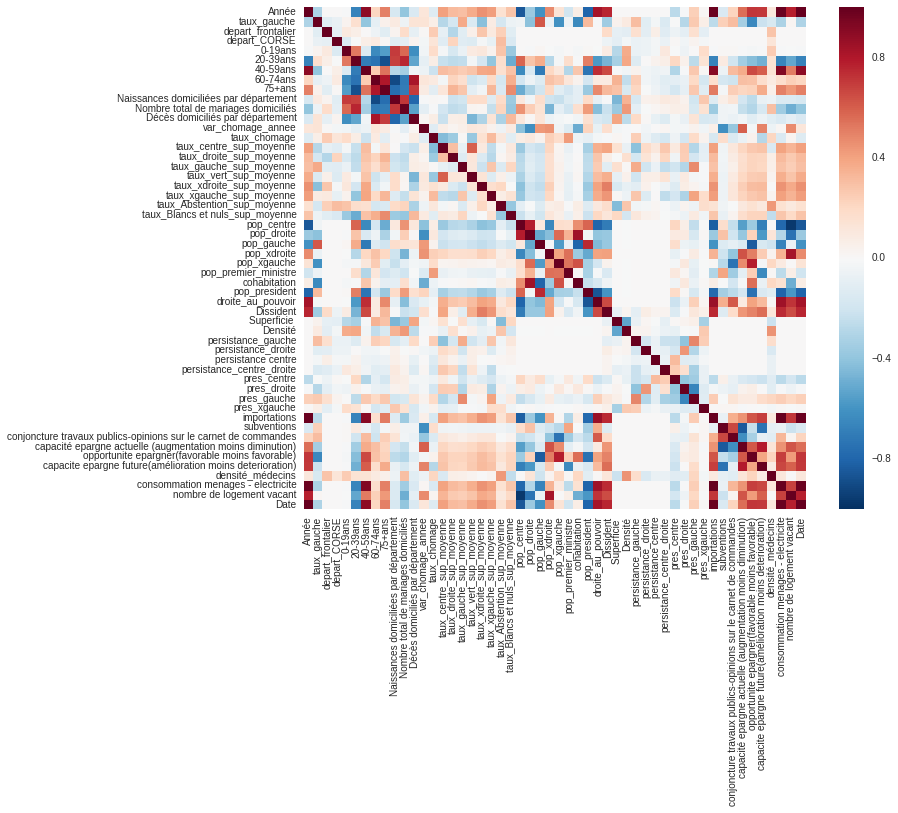

In [13]:
corrmat = dft12.corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn
sns.heatmap(corrmat, vmax=1, square=True)
plt.show()

In [24]:
Counter(df_train["pop_president"])

Counter({25: 96, 38: 96, 50: 96, 58: 96})

In [14]:
# df_train_x1 = df_train_x[["var_chomage_annee", "taux_gauche_sup_moyenne", "40-59ans"]]
# df_test_x1 = df_test_x[["var_chomage_annee", "taux_gauche_sup_moyenne", "40-59ans"]]
# print(df_test_x1.shape, df_train_x1.shape)
X = sm.add_constant(df_train_x)
X_test = sm.add_constant(df_test_x)

model = sm.OLS(df_train_y, X)
results = model.fit()
print(metrics.r2_score(results.predict(X_test), df_test_y))

#print(metrics.r2_score(model.predict(df_test_x), df_test_y))
print(results.summary())

0.881263171063
                            OLS Regression Results                            
Dep. Variable:            taux_gauche   R-squared:                       0.894
Model:                            OLS   Adj. R-squared:                  0.883
Method:                 Least Squares   F-statistic:                     83.74
Date:                Fri, 24 Mar 2017   Prob (F-statistic):          1.22e-147
Time:                        16:07:53   Log-Likelihood:                -785.88
No. Observations:                 384   AIC:                             1644.
Df Residuals:                     348   BIC:                             1786.
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         26.5437      0.100    2

In [10]:
svr = DecisionTreeRegressor(max_depth=10,  min_samples_leaf=5)
svr.fit(df_train_x, df_train_y)
print(metrics.mean_squared_error(df_test_y, svr.predict(df_test_x)))
print(metrics.mean_absolute_error(df_test_y, svr.predict(df_test_x)))
print(metrics.r2_score(df_test_y, svr.predict(df_test_x)))
print("\n")
for i in range(len(svr.feature_importances_)):
    print(svr.feature_importances_[i], df_train.drop("taux_gauche", axis=1).columns[i])



1.2086418746
0.819005174248
0.96343999819


0.0 depart_frontalier
0.0 depart_CORSE
0.00118752552119 0-19ans
0.000647478246376 20-39ans
0.00143752300458 40-59ans
0.00043038495453 60-74ans
0.00162074222902 75+ans
0.00809644737571 Naissances domiciliées par département
0.0 Nombre total de mariages domiciliés
0.00610203652401 Décès domiciliés par département
0.00737369044216 var_chomage_annee
0.00575098634553 taux_chomage
0.00460384862207 taux_centre_sup_moyenne
0.0 taux_droite_sup_moyenne
0.178201498337 taux_gauche_sup_moyenne
0.0 taux_vert_sup_moyenne
0.0115728766128 taux_xdroite_sup_moyenne
0.00835666590966 taux_xgauche_sup_moyenne
0.0 taux_Abstention_sup_moyenne
0.00892839847028 taux_Blancs et nuls_sup_moyenne
0.0 pop_centre
0.0 pop_droite
0.608246068147 pop_gauche
0.0 pop_xdroite
0.0 pop_xgauche
0.0 pop_premier_ministre
0.0 cohabitation
0.00588982108017 pop_president
0.0 droite_au_pouvoir
0.0845939201307 Dissident
0.0167663960631 Superficie 
0.00735585945066 Densité
0.00755849025447 p

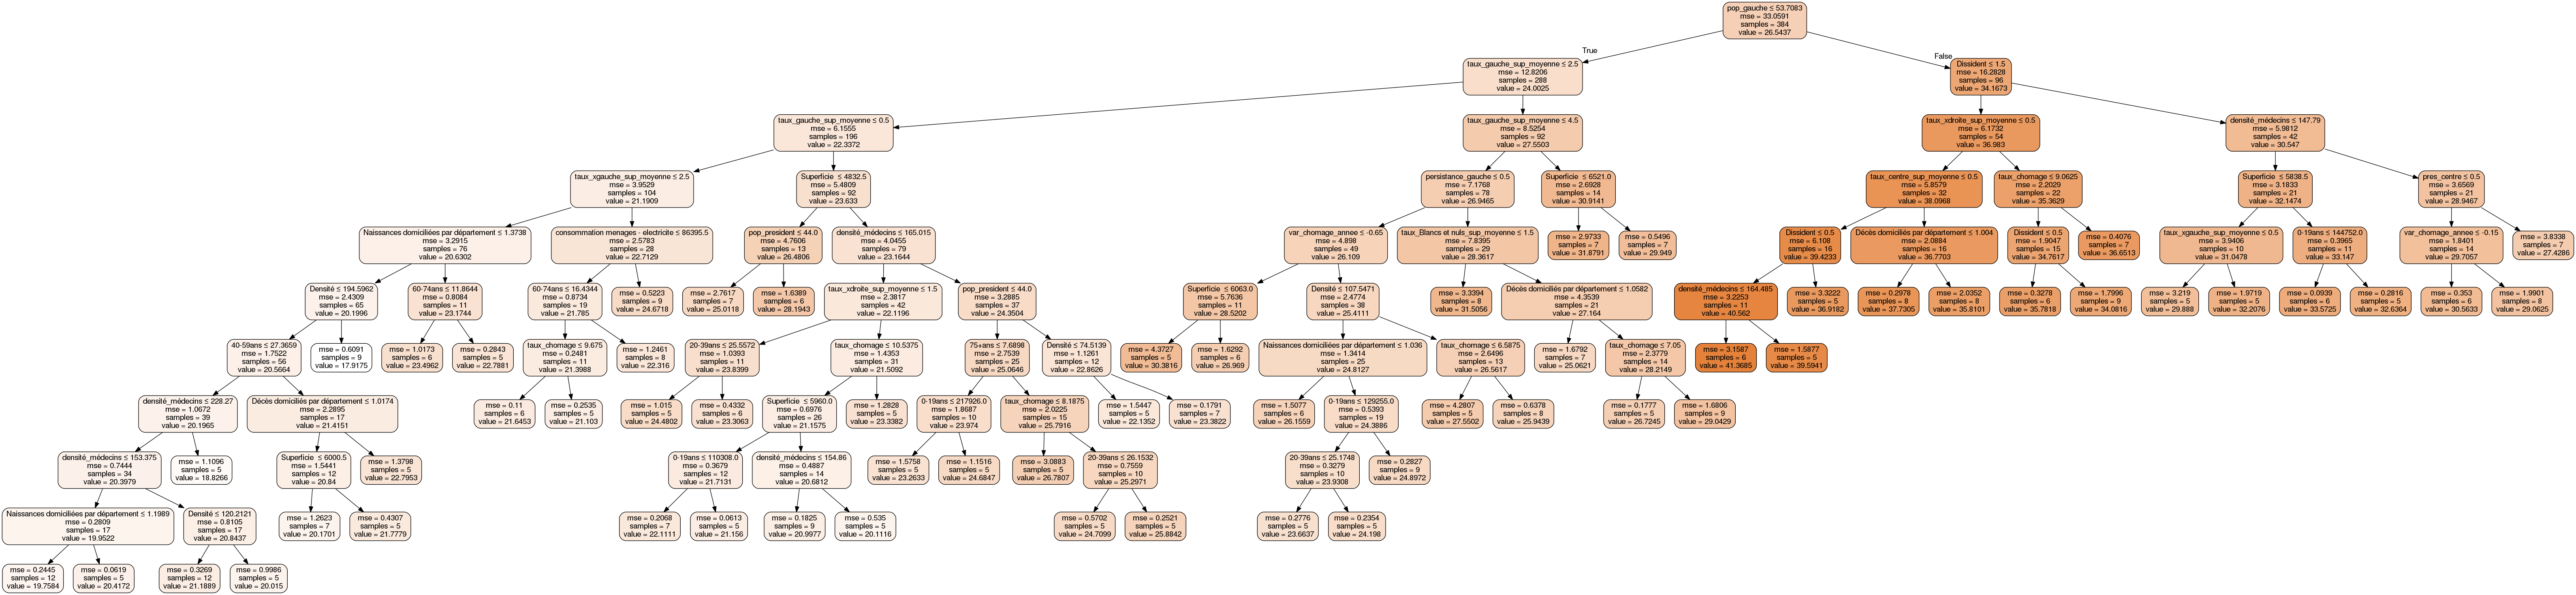

In [11]:
dot_data = tree.export_graphviz(svr, out_file=None,
                         feature_names=name_columns,    
                         filled=True, rounded=True,  
                         special_characters=True)  

graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

In [12]:
graph.write_pdf("decision_tree_split5.pdf")

True

In [35]:
svr = linear_model.Lasso(alpha=0.01)

svr.fit(df_train_x, df_train_y)
print(metrics.mean_squared_error(df_test_y, svr.predict(df_test_x)))
print(metrics.mean_absolute_error(df_test_y, svr.predict(df_test_x)))
print(metrics.r2_score(df_test_y, svr.predict(df_test_x)))

for i in range(len(svr.coef_)):
    print(svr.coef_[i], df_test.drop("taux_gauche", axis=1).columns[i])
    
print(svr.score(df_test_x, df_test_y))

3.53074713704
1.46723834654
0.893199032373
-0.0 depart_frontalier
0.0819795147556 depart_CORSE
0.0962450513841 0-19ans
-0.0 20-39ans
-1.89035605433 40-59ans
-0.860895629556 60-74ans
1.16345952465 75+ans
0.0 Naissances domiciliées par département
-0.447742512839 Nombre total de mariages domiciliés
-0.270285032414 Décès domiciliés par département
0.0926659445342 var_chomage_annee
-0.0 taux_chomage
-0.709189152538 taux_centre_sup_moyenne
-0.853071223663 taux_droite_sup_moyenne
1.00990386456 taux_gauche_sup_moyenne
0.510586809773 taux_vert_sup_moyenne
-1.27554378909 taux_xdroite_sup_moyenne
0.0904781239358 taux_xgauche_sup_moyenne
0.00178123546366 taux_Abstention_sup_moyenne
-0.346846053207 taux_Blancs et nuls_sup_moyenne
-0.0 pop_centre
-0.0 pop_droite
0.0 pop_gauche
-0.0 pop_xdroite
-2.02734654 pop_xgauche
-0.0 pop_premier_ministre
-0.0 cohabitation
0.0 pop_president
0.0 droite_au_pouvoir
-1.02333124399 Dissident
0.0327298432897 Superficie 
0.498968523193 Densité
0.809173439135 persistan